## Import the data from the server

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import psycopg2
from psycopg2 import Error

In [5]:
try:
    connection = psycopg2.connect(user="lvf7916",
                                  password="xxx",
                                  host="pg.analytics.northwestern.edu",
                                  port="5432",
                                  database="everything2023")

    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)

In [6]:
sku = pd.read_sql("SELECT * FROM group_5.skuinfo", connection);
sku

/var/folders/6r/cwd2y27x0yq0d6dg5cj_ndb00000gn/T/ipykernel_31505/4214894946.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sku = pd.read_sql("SELECT * FROM group_5.skuinfo", connection);


,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,0,1,2,3,4,5,6,7,8,9
1,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
2,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
3,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
4,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
...,...,...,...,...,...,...,...,...,...,...
1556026,9999973,3103,009,400009973999,702 S3JAYV,STONE,4,1,6813115,POLO JEA
1556027,9999974,9801,726,400009974999,G50171,NAVY MULTI,10,1,9212766,GABAR IN
1556028,9999991,2301,004,400009991999,026 MDU201,618RED ROSE,8,1,23272,JONES/LA
1556029,9999992,1202,402,400009992999,14 F52UN1,PALE JADE,L,1,1446212,CABERNET


In [9]:
if (connection):
    cursor.close()
    connection.close()
    print("PostgreSQL connection is closed") 

PostgreSQL connection is closed


## Check Missing Values

In [58]:
sku.isnull().sum()/sku.shape[0]*100

SKU         0.0
DEPT        0.0
CLASSID     0.0
UPC         0.0
STYLE       0.0
COLOR       0.0
SIZE        0.0
PACKSIZE    0.0
VENDOR      0.0
BRAND       0.0
dtype: float64

## Check Redundancy

In [60]:
# Calculate UPC counts and sort
upc_count = sku.groupby('UPC')['SKU'].count().sort_values(ascending=False)

# Print the UPC counts
print(upc_count)

# Number of different UPC IDs
print("\nNumber of different UPC IDs: " + str(upc_count.shape[0]))

UPC
3               1
400007214122    1
400007214175    1
400007214164    1
400007214163    1
               ..
400002181687    1
400002181686    1
400002181685    1
400002181684    1
400009999998    1
Name: SKU, Length: 1556031, dtype: int64

Number of different UPC IDs: 1556031


Hence, UPC, known as unique product code, is indeed unique, but we have already had SKU as a primary key, thus this variable can be kindly dropped.

## EDA for other columns

In [82]:
def analyze_counts(df, column_name, top_n=20):
    # Calculate classid counts and sort
    classid_count = df.groupby(column_name)['SKU'].count().sort_values(ascending=False)

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create a color palette for the bars
    colors = plt.cm.viridis_r(range(len(classid_count)))

    # Create the bar plot with customized aesthetics
    classid_count.head(top_n).plot(kind='bar', rot=45, ax=ax, color=colors)

    # Add counts on top of bars with custom formatting
    for i, count in enumerate(classid_count.head(top_n)):
        ax.text(i, count + 10, str(count), ha='center', fontsize=6, color='purple')

    # Set the title, labels, and adjust font size
    ax.set_title(f"Top {top_n} {column_name}s", fontsize=14)
    ax.set_xlabel(column_name, fontsize=12)
    ax.set_ylabel(f"No. of SKUs", fontsize=12)

    # Customize the grid
    ax.yaxis.grid(linestyle='--', alpha=0.7)

    # Remove the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Customize the x-axis and y-axis tick labels
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Show the plot
    plt.tight_layout()
    plt.show()

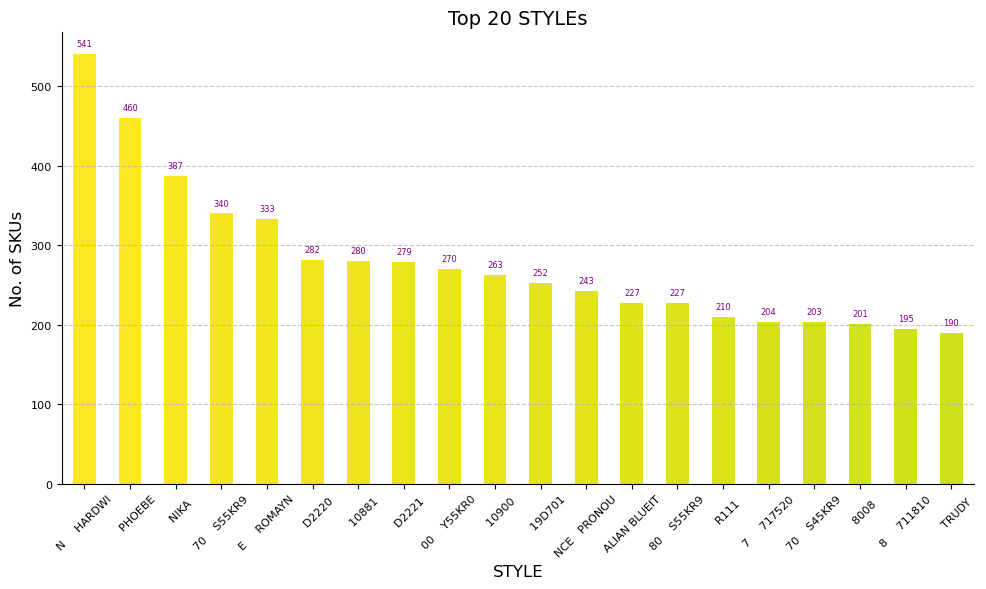

In [83]:
analyze_counts(sku, 'STYLE')

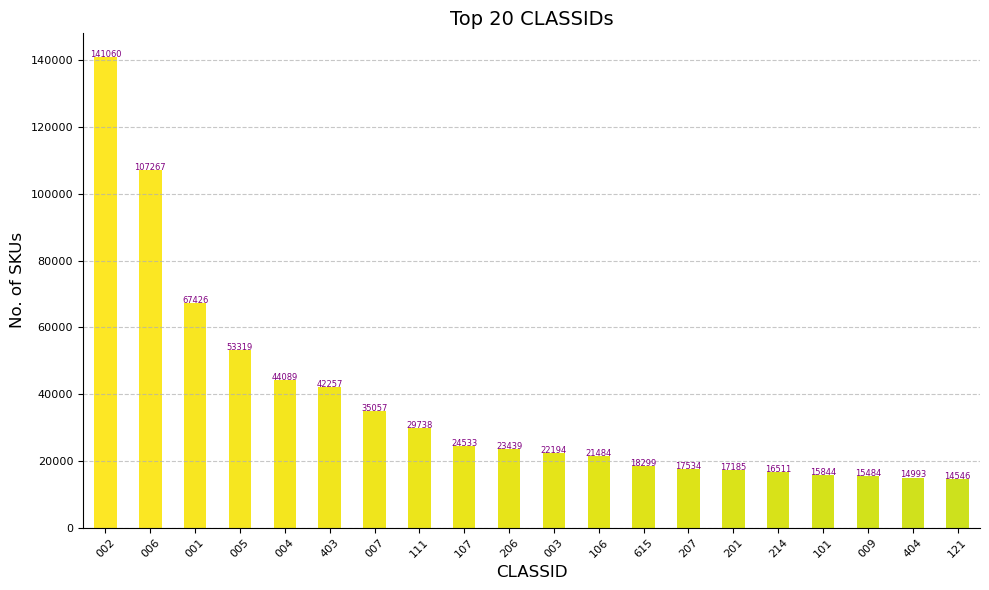

In [84]:
analyze_counts(sku, 'CLASSID')

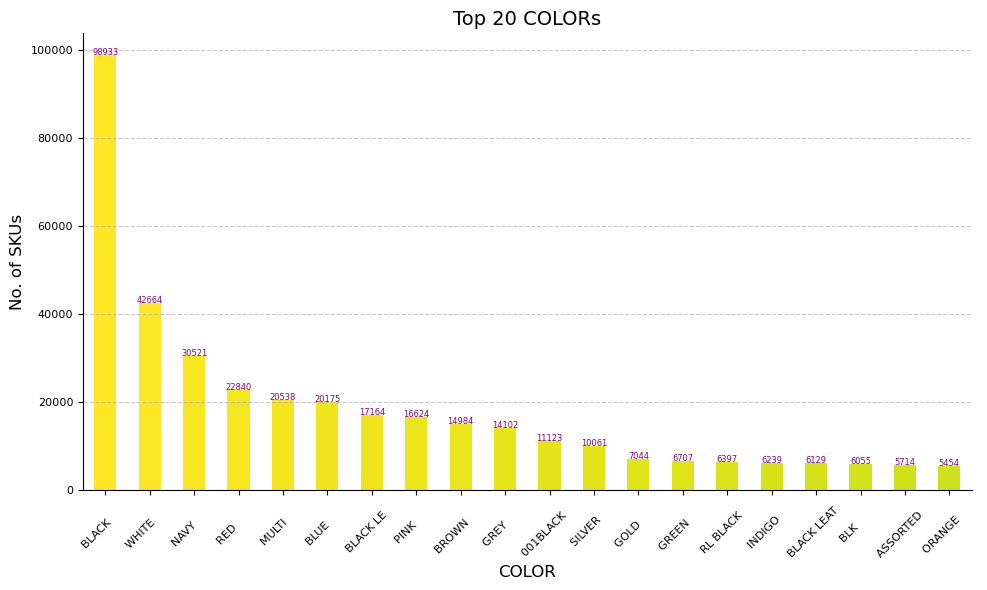

In [85]:
analyze_counts(sku, 'COLOR')

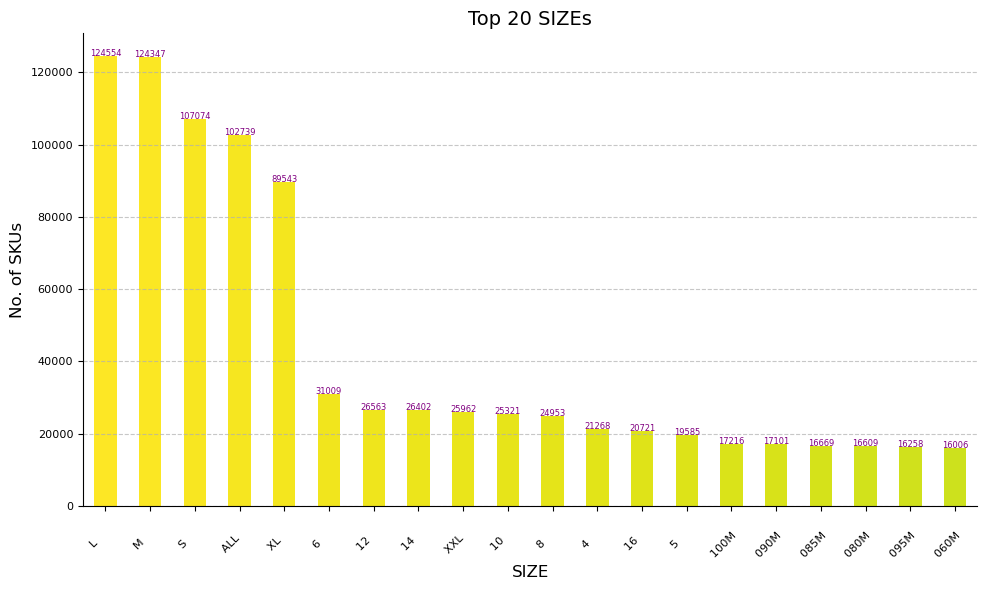

In [88]:
analyze_counts(sku, 'SIZE')

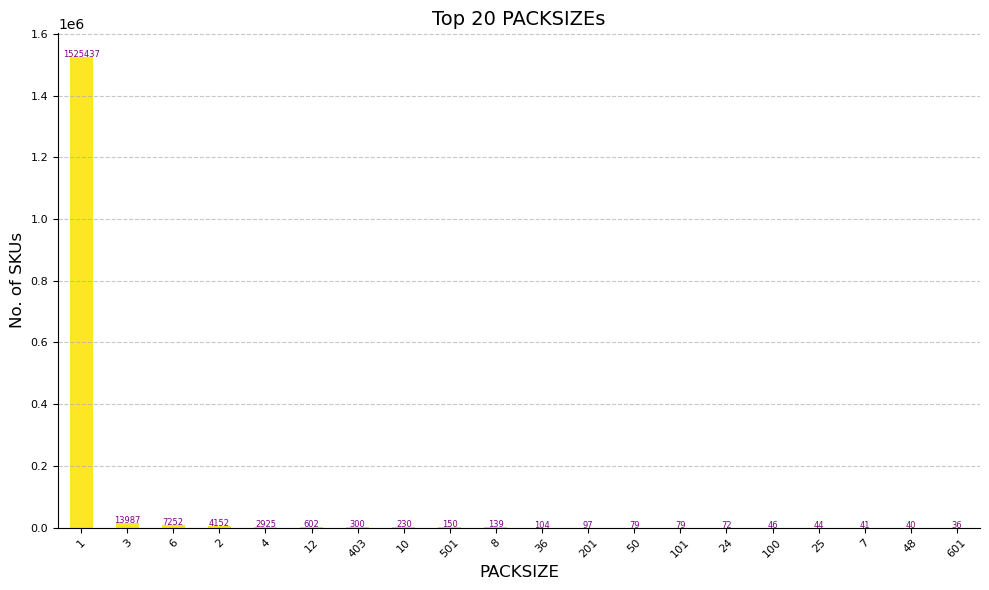

In [89]:
analyze_counts(sku, 'PACKSIZE')

Text(0.5, 1.0, 'Distribution of pack size')

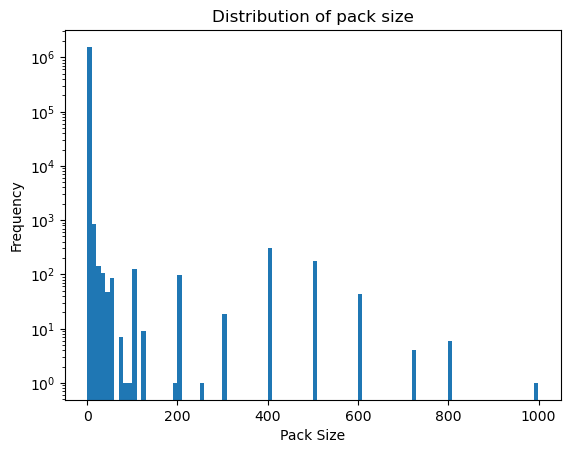

In [93]:
ax2 = sku['PACKSIZE'].plot.hist(bins = 100, log = True)
plt.xlabel("Pack Size")
plt.title("Distribution of pack size")

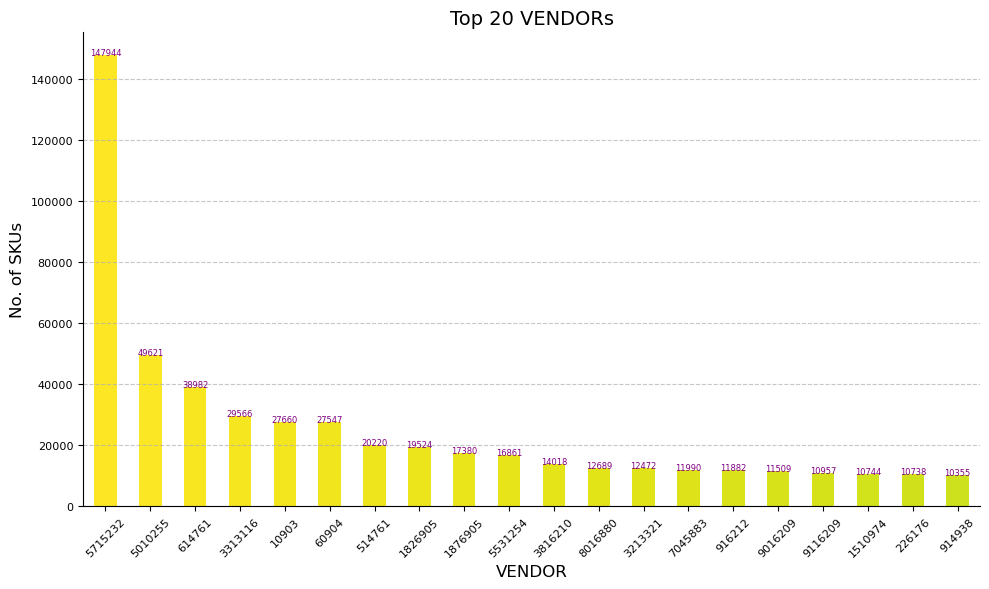

In [94]:
analyze_counts(sku, 'VENDOR')

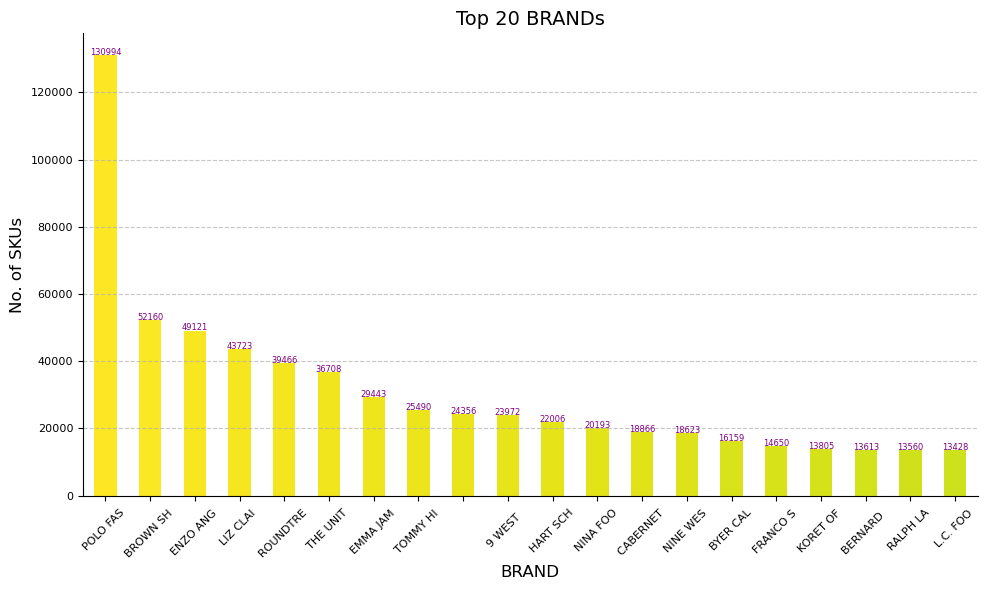

In [95]:
analyze_counts(sku, 'BRAND')